In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Dropout
warnings.filterwarnings('ignore')
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional


In [ ]:
test =pd.read_csv('/content/data_test_24-29.csv')
train = pd.read_csv('/content/data_train_24-29 (1).csv')



In [ ]:
train_data = train.drop(['TIME IN GMT','TIME IN IST','Lat ','Long', 'Time','T','Date'], axis=1)
test_data = test.drop(['TIME IN GMT','TIME IN IST','Lat ','Long', 'Time','T','Date'], axis=1)


In [ ]:
train_data.dropna(axis=0, how='any', inplace=True)


In [ ]:
test_data.dropna(axis=0, how='any', inplace=True)
test_data.shape

(44574, 8)

In [ ]:
n_time_steps = 104
n_features = 7 
step = 80
n_classes = 5 
n_epochs = 50       
batch_size = 64   
learning_rate = 0.0001
l2_loss = 0.00015

segments = []
labels = []


In [ ]:
for i in range(0,  train_data.shape[0]- n_time_steps, step):  

    Ax_tr = train_data['Ax'].values[i: i + n_time_steps]

    Ay_tr = train_data['Ay'].values[i: i + n_time_steps]

    Az_tr = train_data['Az'].values[i: i + n_time_steps]

    Gx_tr = train_data['Gx'].values[i: i + n_time_steps]

    Gy_tr = train_data['Gy'].values[i: i + n_time_steps]

    Gz_tr = train_data['Gz'].values[i: i + n_time_steps]

    Speed_tr = train_data['Speed'].values[i: i + n_time_steps]


    label_tr = stats.mode(train_data['Label'][i: i + n_time_steps])[0][0]

    segments.append([Ax_tr, Ay_tr, Az_tr, Gx_tr,Gy_tr,Gz_tr,Speed_tr])

    labels.append(label_tr)

In [ ]:
X_train = np.asarray(segments, dtype= np.float32).reshape(-1, n_time_steps, n_features)

y_train = np.asarray(pd.get_dummies(labels), dtype = np.float32)

X_train.shape

(2228, 104, 7)

In [ ]:
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, n_time_steps, n_features)

In [ ]:
labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)

reshaped_segments.shape

(2228, 104, 7)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reshaped_segments, labels, test_size = 0.25)


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Dropout
from keras.layers import TimeDistributed

import os
from tensorflow.keras import Input
from tensorflow.keras.models import load_model, Model

from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Lambda, Dot, Activation, Concatenate, Layer
# model = Sequential()
# # RNN layer
# model.add(LSTM(units = 100, input_shape = (X_train.shape[1], X_train.shape[2])))

# # Dropout layer
# model.add(Dropout(0.4))
 
# # Dense layer with ReLu
# model.add(Dense(units = 32, activation='tanh'))

# # Softmax layer
# model.add(Dense(y_train.shape[1], activation = 'softplus'))

# # Compile model
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.summary()
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Dropout
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

model = Sequential()
x = model.add(Bidirectional(LSTM(100, return_sequences=False), input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Bidirectional(LSTM(100)))(x)
model.add(Dense(units = 64, activation='tanh'))
model.add(Dense(y_train.shape[1], activation = 'softplus'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_9 (Bidirectio  (None, 200)              86400     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 64)                12864     
                                                                 
 dense_7 (Dense)             (None, 5)                 325       
                                                                 
Total params: 99,589
Trainable params: 99,589
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Dropout

In [ ]:
print(X_test.shape)
print(y_test.shape)

(557, 104, 7)
(557, 5)


In [ ]:
history = model.fit(X_train, y_train, epochs = n_epochs, validation_data = (X_test, y_test), batch_size = batch_size, verbose = 1)

#history = model.fit(X_train, y_train, epochs = n_epochs, validation_data = (X_test, y_test), batch_size = batch_size, verbose = 1)


Epoch 1/50
27/27 [==============================] - 10s 231ms/step - loss: 0.8444 - accuracy: 0.7600 - val_loss: 0.6431 - val_accuracy: 0.8294
Epoch 2/50
27/27 [==============================] - 5s 184ms/step - loss: 0.5926 - accuracy: 0.8300 - val_loss: 0.5196 - val_accuracy: 0.8294
Epoch 3/50
27/27 [==============================] - 5s 183ms/step - loss: 0.4592 - accuracy: 0.8462 - val_loss: 0.4030 - val_accuracy: 0.8689
Epoch 4/50
27/27 [==============================] - 5s 185ms/step - loss: 0.3587 - accuracy: 0.8695 - val_loss: 0.2988 - val_accuracy: 0.8869
Epoch 5/50
27/27 [==============================] - 5s 184ms/step - loss: 0.2824 - accuracy: 0.8965 - val_loss: 0.2649 - val_accuracy: 0.9013
Epoch 6/50
27/27 [==============================] - 5s 185ms/step - loss: 0.2538 - accuracy: 0.9102 - val_loss: 0.2365 - val_accuracy: 0.9210
Epoch 7/50
27/27 [==============================] - 5s 183ms/step - loss: 0.2426 - accuracy: 0.9168 - val_loss: 0.2737 - val_accuracy: 0.8995
Epoch

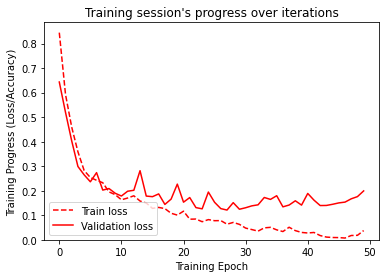

In [ ]:
plt.plot(np.array(history.history['loss']), "r--", label = "Train loss")
# plt.plot(np.array(history.history['accuracy']), "g--", label = "Train accuracy")
plt.plot(np.array(history.history['val_loss']), "r-", label = "Validation loss")
# plt.plot(np.array(history.history['val_accuracy']), "g-", label = "Validation accuracy")
plt.title("Training session's progress over iterations")
plt.legend(loc='lower left')
plt.ylabel('Training Progress (Loss/Accuracy)')
plt.xlabel('Training Epoch')
plt.ylim(0) 
plt.show()

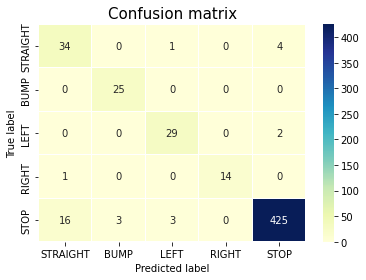

In [ ]:
import sklearn.metrics as metrics

predictions = model.predict(X_test)
class_labels = [ 'STRAIGHT', 'BUMP', 'LEFT',  'RIGHT','STOP']
max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)

sns.heatmap(confusion_matrix, xticklabels = class_labels, yticklabels = class_labels, annot = True, linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size = batch_size, verbose = 1)
print("Test Accuracy :", accuracy)
print("Test Loss :", loss)

9/9 [==============================] - 0s 48ms/step - loss: 0.1993 - accuracy: 0.9461
Test Accuracy : 0.9461400508880615
Test Loss : 0.19927477836608887


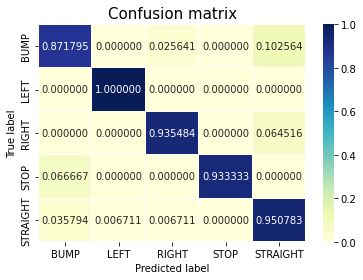

In [ ]:


import sklearn.metrics as metrics

predictions = model.predict(X_test)
class_labels = ['BUMP', 'LEFT',  'RIGHT','STOP', 'STRAIGHT']
max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)
cmn = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn, xticklabels = class_labels, yticklabels = class_labels, annot = True, linewidths = 0.1, fmt='2f', cmap = 'YlGnBu')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()